# Exercise 8.1
## Sinus forecasting
In this task, we will learn to implement RNNs in Keras.
Therefore:
 - Run the provided script and comment on the output.
 - Vary the number and size of the LSTM layers and compare training time and stability of the performance.

The goal of this task is to predict the next value of a sine function. This is a special case because the output of the network (the `y` value) should correponds to the next input `x` value.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
layers = keras.layers

print(keras.__version__)

### Generation of data
We start by creating a signal trace: `t = 0-100`, `f = sin(pi * t)`

In [2]:
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

Split into semi-redundant sub-sequences of `length = window_size + 1` and perform shuffle

In [3]:
window_size = 20
n = N - window_size - 1  # number of possible splits
print(f"generating {n} semi redundant sub-sequences with size {window_size+1}.")
data = np.stack([f[i: i + window_size + 1] for i in range(n)])
print(data.shape)

generating 9979 semi redundant sub-sequences with size 21.
(9979, 21)


Finally, split the data into features. The `x` values are the first 20 data points of a sequence. The `y` value is the corresponding next value in the sequence.

In [4]:
X, y = np.split(data, [-1], axis=1)

# as always, another dimension is added to the input vector
# because the KERAS library also allows for multiple inputs per time step.
# In our case here, we have just one input value per time stamp.
X = X[..., np.newaxis]
print(X.shape)
print(y.shape)
print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

(9979, 20, 1)
(9979, 1)
Example:
X = [0.         0.0314139  0.06279679 0.0941177  0.1253457  0.15644998
 0.18739983 0.21816471 0.24871423 0.27901826 0.30904688 0.33877044
 0.36815961 0.39718538 0.42581909 0.45403249 0.48179773 0.50908739
 0.53587454 0.56213275]
y = [0.58783609]


### Define and train RNN

In [5]:
z0 = layers.Input(shape=[None, 1])

# One layer
z1 = layers.LSTM(16)(z0)
z1 = layers.Dense(1)(z1)

model1 = keras.models.Model(inputs=z0, outputs=z1)
print(model1.summary())

model1.compile(loss='mse', optimizer='adam')

# Two layers
z2 = layers.LSTM(32, return_sequences=True)(z0)  
z2 = layers.LSTM(16)(z2)
z2 = layers.Dense(1)(z2)

model2 = keras.models.Model(inputs=z0, outputs=z2)
print(model2.summary())

model2.compile(loss='mse', optimizer='adam')

# Three layers
z3 = layers.LSTM(64, return_sequences=True)(z0)
z3 = layers.LSTM(32, return_sequences=True)(z3)
z3 = layers.LSTM(16)(z3)
z3 = layers.Dense(1)(z3)

model3 = keras.models.Model(inputs=z0, outputs=z3)
print(model3.summary())

model3.compile(loss='mse', optimizer='adam')

I0000 00:00:1763623361.434172  812360 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46592 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:17:00.0, compute capability: 8.6
I0000 00:00:1763623361.434848  812360 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46763 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:b3:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 32)       │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,505 (29.32 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, None, 64)       │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, None, 32)       │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
results1 = model1.fit(X, y,
    epochs=60,
    batch_size=32,
    verbose=2,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(factor=0.67, patience=3, verbose=1, min_lr=1E-5),
        keras.callbacks.EarlyStopping(patience=4, verbose=1)])

results2 = model2.fit(X, y,
    epochs=60,
    batch_size=32,
    verbose=2,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(factor=0.67, patience=3, verbose=1, min_lr=1E-5),
        keras.callbacks.EarlyStopping(patience=4, verbose=1)])

results3 = model3.fit(X, y,
    epochs=60,
    batch_size=32,
    verbose=2,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(factor=0.67, patience=3, verbose=1, min_lr=1E-5),
        keras.callbacks.EarlyStopping(patience=4, verbose=1)])

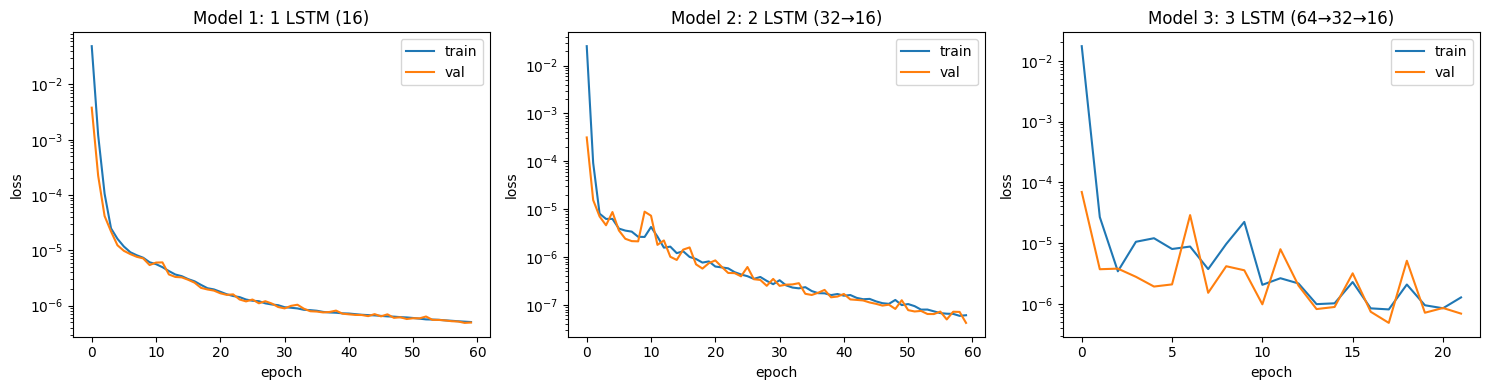

In [7]:
plt.figure(figsize=(15, 4))

# --- Model 1 ---
plt.subplot(1, 3, 1)
plt.plot(results1.history['loss'])
plt.plot(results1.history['val_loss'])
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.title("Model 1: 1 LSTM (16)")
plt.legend(['train', 'val'], loc='upper right')

# --- Model 2 ---
plt.subplot(1, 3, 2)
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.title("Model 2: 2 LSTM (32→16)")
plt.legend(['train', 'val'], loc='upper right')

# --- Model 3 ---
plt.subplot(1, 3, 3)
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.title("Model 3: 3 LSTM (64→32→16)")
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()
plt.show()


### Evaluate the model
Investigate the forecasting capabilities of the model.

In [8]:
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=0)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y

In [14]:
def plot_prediction(model, i0=0, k=500):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')

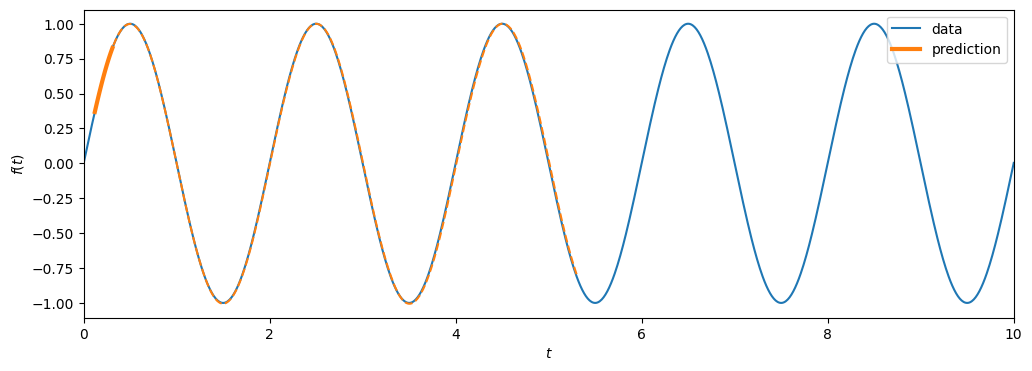

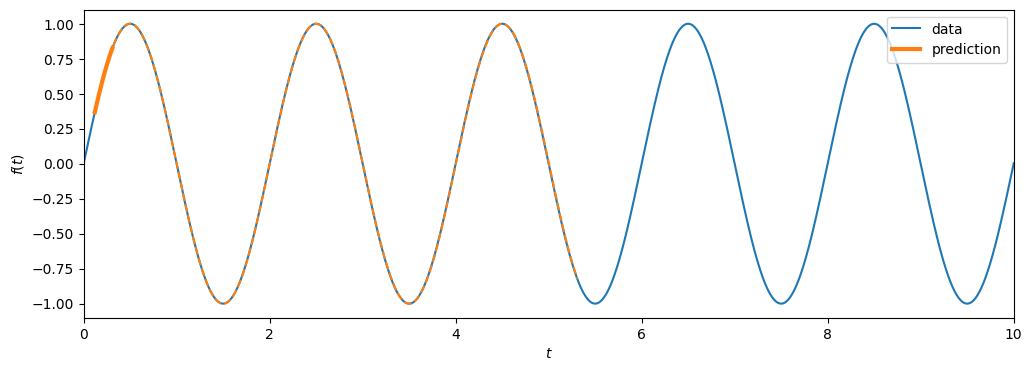

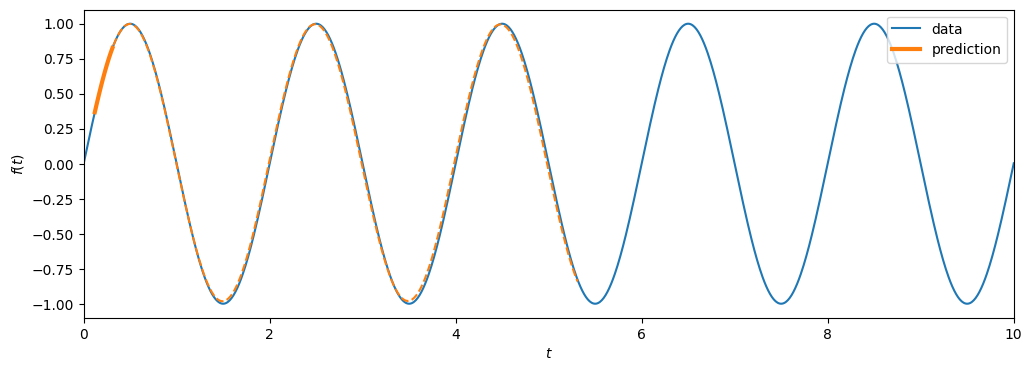

In [15]:
plot_prediction(model1, 12)
plot_prediction(model2, 12)
plot_prediction(model3, 12)

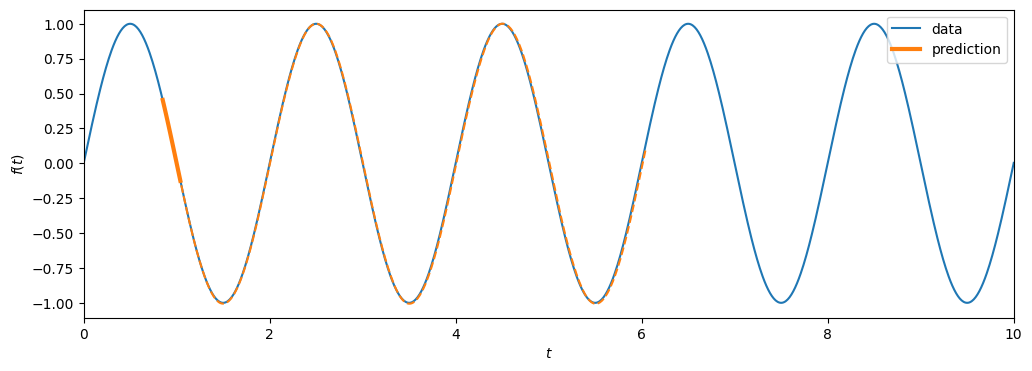

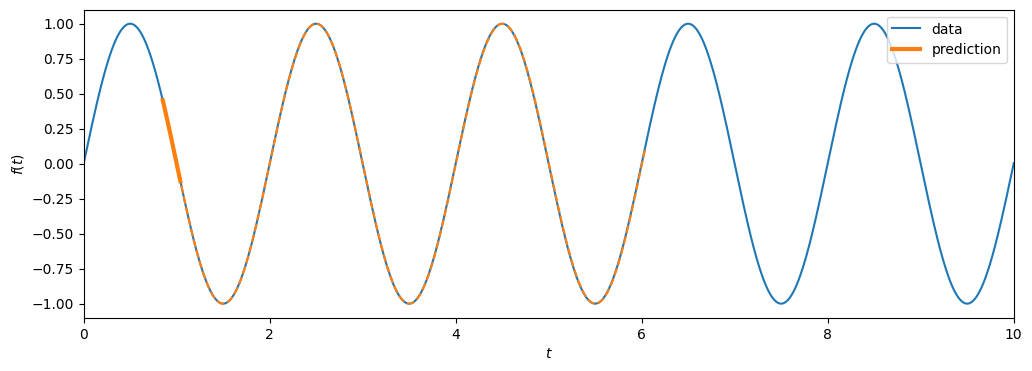

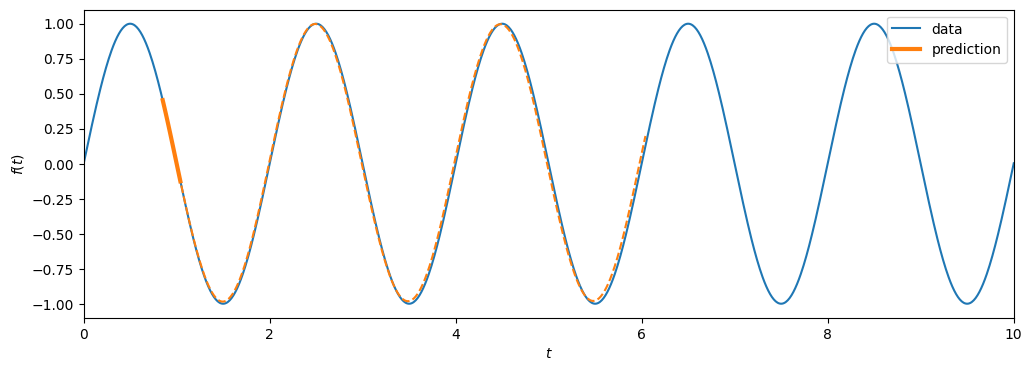

In [16]:
plot_prediction(model1, 85)
plot_prediction(model2, 85)
plot_prediction(model3, 85)


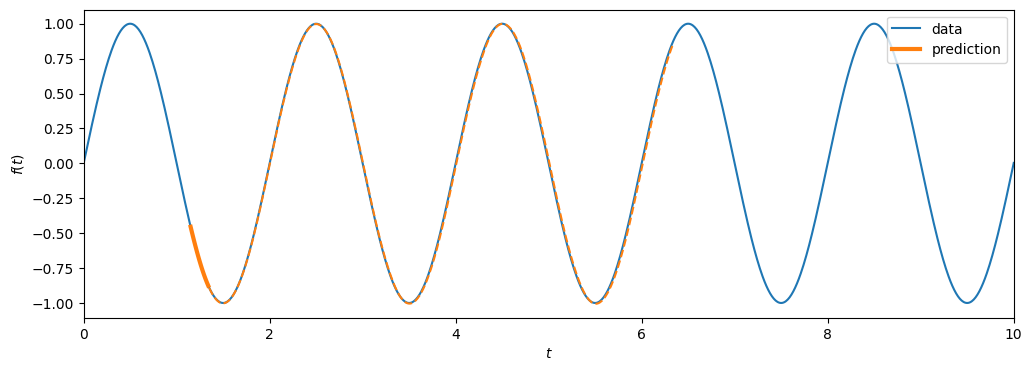

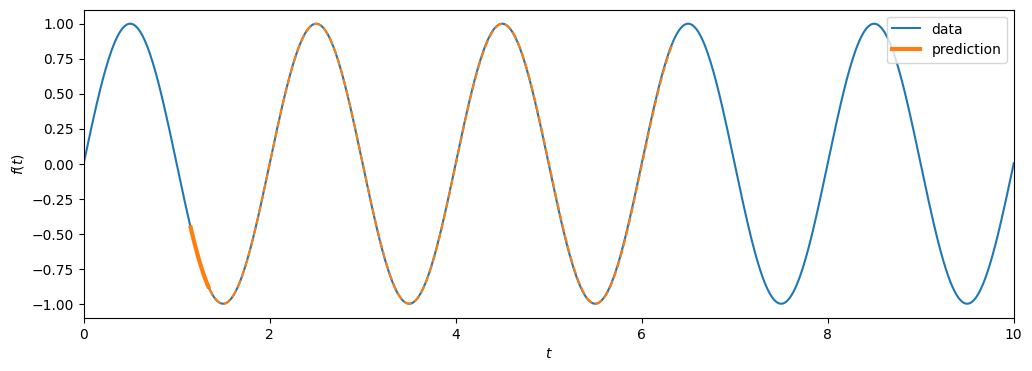

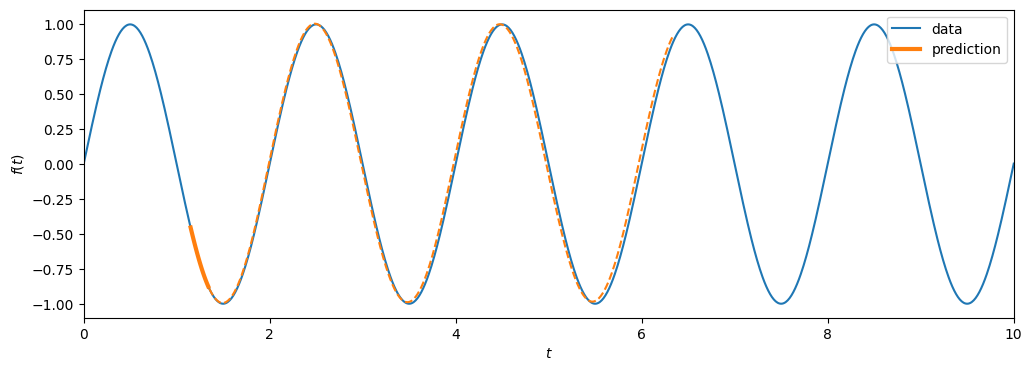

In [17]:
plot_prediction(model1, 115)
plot_prediction(model2, 115)
plot_prediction(model3, 115)

# Final observations

* Three LSTM models with varying number of layers and sizes were compared. Model 1 (1 layer, 16 units) was very stable but reached a higher final loss. Model 2 (2 layers, 32→16 units) showed slightly more noise than Model 1 but much less than Model 3, achieving the lowest final loss and the best balance between accuracy and stability. Model 3 (3 layers, 64→32→16 units) was noisier and less stable. However, all three models provided reasonably good predictions when compared to the data.
